In [3]:
import pandas as pd
from collections import defaultdict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (20, 10)

plt.subplots_adjust(top=0.9)

folder = '/home/jgf/git/Empirical/examples/evo/concept/nomap/grid-pools-infinite-private-pts/'

num_reps = 10

base_template = "{tlf}{parb}{paropt}/{struct}-{rep}-quorum.csv"

options = [10, 15, 20, 30, 5]

loaded_replicants = []
loaded_parent = []
loaded_base = []
loaded_children = []

parent_base = 'SUBGRID_SIZE_'
structure = ['grid-pools-quorum.out']

for parent in options:
    for replicant in range(0,num_reps):
        try:
            loaded = pd.read_csv(base_template.format(tlf=folder,
                                                      parb=parent_base,
                                                      paropt=parent,
                                                      struct=structure[0],
                                                      rep=replicant), sep=' ')
        except Exception as err:
            print("Apparently there isn't anything in there")
            print(base_template.format(tlf=folder,
                                      parb=parent_base,
                                      paropt=parent,
                                      struct=structure[0],
                                      rep=replicant))
            continue

        loaded['replicant'] = replicant
        loaded_children.append(loaded)
    loaded_parent = pd.concat(loaded_children)
    loaded_parent['Subgrid Size'] = parent
    loaded_children = []
    loaded_base.append(loaded_parent)

squished_base = pd.concat(loaded_base)
squished_base = squished_base.drop_duplicates()
squished_base

Populating the interactive namespace from numpy and matplotlib


,update,avg_age,max_age,avg_coop,avg_points,percentlying_defector,percentdonator,grid_usage,available_private_pts,replicant,Subgrid Size
0,0,0.00000,0,1.000000,0.00000,0,1,0.090000,180000.0,0,10
1,10,10.00000,10,1.000000,10.00000,0,1,0.090000,100000000.0,0,10
2,20,20.00000,20,1.000000,20.00000,0,1,0.090000,100000000.0,0,10
3,30,7.23961,8,0.997943,7.00000,0,1,0.170417,100000000.0,0,10
4,40,17.23960,18,0.997943,17.00000,0,1,0.170417,100000000.0,0,10
5,50,4.24253,27,0.996104,4.17897,0,1,0.290625,100000000.0,0,10
6,60,14.08320,37,0.996022,13.96360,0,1,0.292292,100000000.0,0,10
7,70,1.43517,47,0.994382,1.49217,0,1,0.430069,100000000.0,0,10
8,80,10.93060,34,0.994221,11.14880,0,1,0.434583,100000000.0,0,10
9,90,20.53530,22,0.994064,20.59670,0,1,0.436528,100000000.0,0,10


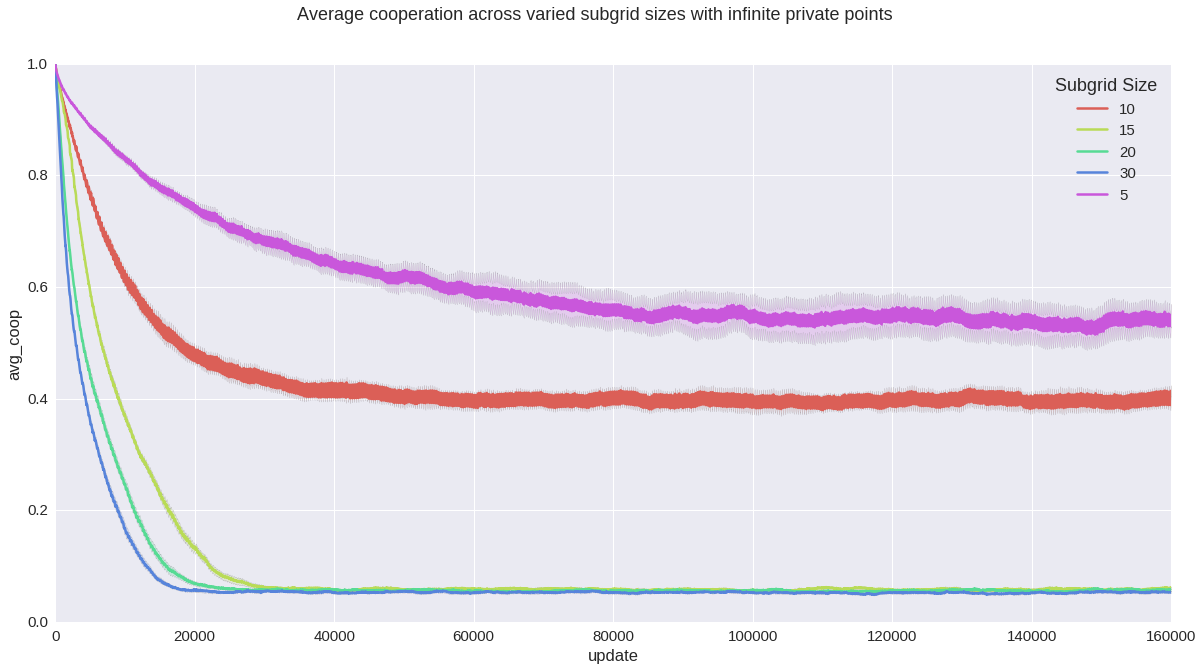

In [4]:
sns.plt.suptitle("Average cooperation across varied subgrid sizes with infinite private points")
ax = sns.tsplot( time="update", value="avg_coop", unit="replicant", 
    condition="Subgrid Size", ci=95, data=squished_base, color="hls")
ax.patch.set_visible(False)
#squished_base[ (squished_base['replicant'] == 5) &  (squished_base["Subgrid Size"] == 10) & (squished_base['update'] == 10)]